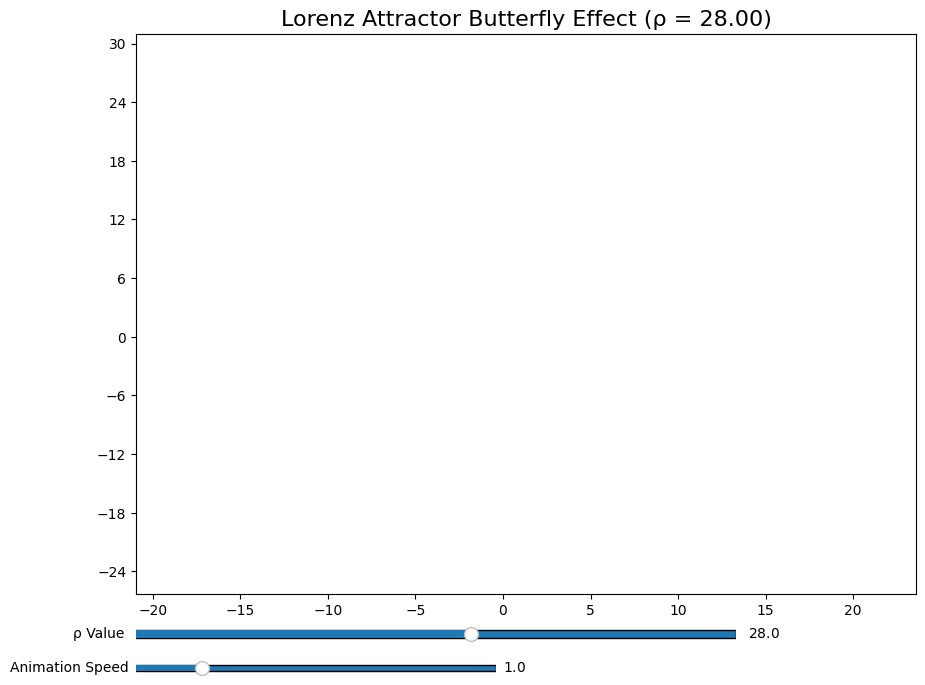

In [28]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
# Set up the Lorenz system parameters
sigma = 10.0       # Prandtl number
beta = 8.0 / 3.0   # Dimensionless parameter
rho_init = 28.0    # Rayleigh number (initial value)
# Define the Lorenz system equations
def lorenz_system(state, t, sigma, beta, rho):
    x, y, z = state  # Unpack the state variables
    dx_dt = sigma * (y - x)          # x change over time
    dy_dt = x * (rho - z) - y        # y change over time
    dz_dt = x * y - beta * z         # z change over time
    return [dx_dt, dy_dt, dz_dt]
# Function to compute the Lorenz attractor trajectory
def compute_lorenz(rho):
    # Start near the attractor (slightly off-center)
    initial_state = [0.0, 1.0, 1.0]
    # Time points to solve for (40 seconds divided into 2000 steps)
    time_points = np.linspace(0, 40, 2000)
    # Solve the differential equations
    trajectory = odeint(lorenz_system, initial_state, time_points,
                       args=(sigma, beta, rho))
    return trajectory, time_points
# Calculate initial trajectory
states, time_values = compute_lorenz(rho_init)
# Set up the figure and main plot area
fig, ax = plt.subplots(figsize=(12, 8))
# Make the plot look clean with integer ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Add a time display in the top-left corner
time_display = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14)
plt.title(f"Lorenz Attractor Butterfly Effect (ρ = {rho_init:.2f})", fontsize=16)
# Adjust layout to make room for sliders
plt.subplots_adjust(left=0.25, bottom=0.18)
# Create sliders with a nice blue color scheme
slider_blue = '#1f77b4'
slider_track = '#d0e1f9'
# Main parameter slider (ρ)
rho_slider_ax = plt.axes([0.25, 0.12, 0.5, 0.02], facecolor=slider_track)
rho_slider = Slider(rho_slider_ax, 'ρ Value', 0.1, 50.0,
                   valinit=rho_init, valstep=0.1)
rho_slider.poly.set_facecolor(slider_blue)  # Colored track
rho_slider.ax.patches[0].set_facecolor(slider_blue)  # Handle color
rho_slider.ax.patches[0].set_edgecolor('black')      # Handle border
# Animation speed control
speed_slider_ax = plt.axes([0.25, 0.08, 0.3, 0.015], facecolor=slider_track)
speed_slider = Slider(speed_slider_ax, 'Animation Speed', 0.1, 5.0,
                     valinit=1.0, valstep=0.1)
speed_slider.poly.set_facecolor(slider_blue)
speed_slider.ax.patches[0].set_facecolor(slider_blue)
speed_slider.ax.patches[0].set_edgecolor('black')
# Set some breathing room around the attractor
plot_margin = 4
# Create a colorful line to show the trajectory
color_gradient = plt.get_cmap('plasma')  # Vibrant color scheme
trajectory_line = LineCollection([], linewidths=1.2, alpha=0.7, cmap=color_gradient)
ax.add_collection(trajectory_line)
# Animation setup functions
def setup_animation():
    """Initialize the animation with empty line"""
    trajectory_line.set_segments([])
    time_display.set_text('')
    return trajectory_line, time_display
def update_animation(frame):
    """Update the plot for each animation frame"""
    if frame < 2:  # Skip first few frames
        return trajectory_line, time_display

    # Get all points up to current frame
    x_coords = states[:frame, 0]
    y_coords = states[:frame, 1]

    # Convert points to line segments
    points = np.array([x_coords, y_coords]).T
    segments = np.stack([points[:-1], points[1:]], axis=1)

    # Update the line with new segments
    trajectory_line.set_segments(segments)

    # Color the line based on time progression
    color_values = np.linspace(0, frame - 1, frame - 1)
    trajectory_line.set_array(color_values)
    trajectory_line.set_norm(mcolors.Normalize(vmin=0, vmax=len(time_values)-1))

    # Update time display
    current_time = time_values[frame]
    time_display.set_text(f'Time: {current_time:.2f} seconds')

    return trajectory_line, time_display
def change_parameter(param_value):
    """Recompute trajectory when ρ changes"""
    global states, time_values
    states, time_values = compute_lorenz(rho_slider.val)
    ax.set_title(f"Lorenz Attractor Butterfly Effect (ρ = {rho_slider.val:.2f})", fontsize=16)

    # Adjust plot limits to fit new trajectory
    x_min, x_max = states[:, 0].min(), states[:, 0].max()
    y_min, y_max = states[:, 1].min(), states[:, 1].max()
    ax.set_xlim(x_min - plot_margin, x_max + plot_margin)
    ax.set_ylim(y_min - plot_margin, y_max + plot_margin)

    # Restart animation
    animation.event_source.stop()
    animation.event_source.start()
def change_speed(speed_value):
    """Adjust animation speed"""
    animation.event_source.interval = int(15 / speed_slider.val)
# Connect sliders to their functions
rho_slider.on_changed(change_parameter)
speed_slider.on_changed(change_speed)
# Set initial plot limits
x_range = states[:, 0].min() - plot_margin, states[:, 0].max() + plot_margin
y_range = states[:, 1].min() - plot_margin, states[:, 1].max() + plot_margin
ax.set_xlim(x_range)
ax.set_ylim(y_range)
# Create and start the animation
animation = FuncAnimation(fig, update_animation,
                         frames=len(time_values),
                         init_func=setup_animation,
                         interval=15,
                         blit=True)
# Show the interactive plot
plt.show()